In [1]:
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplot2)
library(readr)
library(RColorBrewer)
library(corrplot)
library(recommenderlab)
library(DataExplorer)
library(latticeExtra)
library(stats)
library(heatmap3)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.2.1     √ purrr   0.3.2
√ tibble  2.1.1     √ dplyr   0.8.3
√ tidyr   0.8.3     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

corrplot 0.84 loaded
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: arules

Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: proxy

Attaching package: 'proxy'

The following object is masked from 'package:Matrix':

    as.matrix

The following objects are mas

In [3]:
#import data
data <- read_csv("sep_payment.csv")

Parsed with column specification:
cols(
  num_invocie = col_double(),
  dateoforder = col_character(),
  dataofpay = col_character(),
  transaction = col_double(),
  shipment_fee = col_double(),
  tax = col_double(),
  juhuasuan = col_double(),
  taobaoke = col_double(),
  tmall_commission = col_double(),
  alipay_servicefee = col_double()
)


In [4]:
# take a quick look at the data
glimpse(data)

Observations: 22,604
Variables: 10
$ num_invocie       <dbl> 5.703059e+17, 5.703439e+17, 5.703441e+17, 5.70323...
$ dateoforder       <chr> "2019-8-8 0:01", "2019-8-8 0:01", "2019-8-8 0:01"...
$ dataofpay         <chr> "2019-9-2 0:00", "2019-9-2 0:00", "2019-9-2 0:00"...
$ transaction       <dbl> 12.27, 6.60, 12.92, 18.61, 6.35, 6.51, 12.24, 6.5...
$ shipment_fee      <dbl> 7.66, 2.14, 2.38, 6.66, 1.90, 2.57, 3.69, 2.14, 7...
$ tax               <dbl> 1.47, 0.63, 1.38, 1.55, 0.69, 0.63, 1.40, 0.63, 5...
$ juhuasuan         <dbl> 0.00, 0.12, 0.37, 0.34, 0.18, 0.12, 0.00, 0.12, 0...
$ taobaoke          <dbl> 0.16, 0.09, 0.00, 0.26, 0.09, 0.00, 0.00, 0.00, 0...
$ tmall_commission  <dbl> 0.27, 0.15, 0.46, 0.43, 0.23, 0.15, 0.27, 0.15, 1...
$ alipay_servicefee <dbl> 0.12, 0.07, 0.13, 0.19, 0.06, 0.07, 0.12, 0.07, 0...


In [5]:
# Checking for NA values
data %>% is.na %>% colSums

num_invocie       dateoforder         dataofpay       transaction 
                0                 0                 0                 0 
     shipment_fee               tax         juhuasuan          taobaoke 
                0                 0                 0                 0 
 tmall_commission alipay_servicefee 
                0                 0

In [6]:
#summary
summary(data)

  num_invocie        dateoforder         dataofpay          transaction    
 Min.   :2.345e+17   Length:22604       Length:22604       Min.   :-42.85  
 1st Qu.:5.712e+17   Class :character   Class :character   1st Qu.:  5.53  
 Median :5.849e+17   Mode  :character   Mode  :character   Median :  8.30  
 Mean   :5.875e+17                                         Mean   : 10.46  
 3rd Qu.:6.058e+17                                         3rd Qu.: 13.73  
 Max.   :6.427e+17                                         Max.   :144.89  
  shipment_fee         tax          juhuasuan           taobaoke     
 Min.   : 0.000   Min.   : 0.00   Min.   :-0.55000   Min.   :-3.330  
 1st Qu.: 1.870   1st Qu.: 0.69   1st Qu.: 0.00000   1st Qu.: 0.000  
 Median : 2.370   Median : 0.94   Median : 0.00000   Median : 0.000  
 Mean   : 2.443   Mean   : 1.01   Mean   : 0.07096   Mean   : 0.482  
 3rd Qu.: 2.590   3rd Qu.: 1.18   3rd Qu.: 0.12000   3rd Qu.: 1.340  
 Max.   :23.350   Max.   :14.67   Max.   : 1.900

In [7]:
# purchase와 return 구분하기 
data$type <- "NA"
data$type <- 
 ifelse(data$transaction >= 0, 'purchase', 'return')
table(data$type)


purchase   return 
   22264      340 

In [9]:
## Hourly, daily and monthly split of date time for Invoice date will be used in single and multivariable plot. 
head(data$dateoforder)
Sys.getlocale("LC_TIME")

data$dateoforder <- as.Date(data$dateoforder, "%Y-%m-%d %H:%M")
data$date <- format(data$dateoforder, "%Y-%m-%d")
data$month <- format(data$dateoforder, "%B")
data$week <- format(data$dateoforder, "%A")
data$time <- format(data$dateoforder, "%H")

[1] "2019-08-08" "2019-08-08" "2019-08-08" "2019-08-08" "2019-08-08"
[6] "2019-08-08"

[1] "Korean_Korea.949"

In [13]:
# net profit 및 total_fee 추가하기 
data$net_value = data$transaction - (data$shipment_fee + data$tax + data$juhuasuan+ data$taobaoke + data$tmall_commission+ data$ alipay_servicefee)

data$total_fee = (data$shipment_fee + data$tax + data$juhuasuan+ data$taobaoke + data$tmall_commission+ data$ alipay_servicefee)

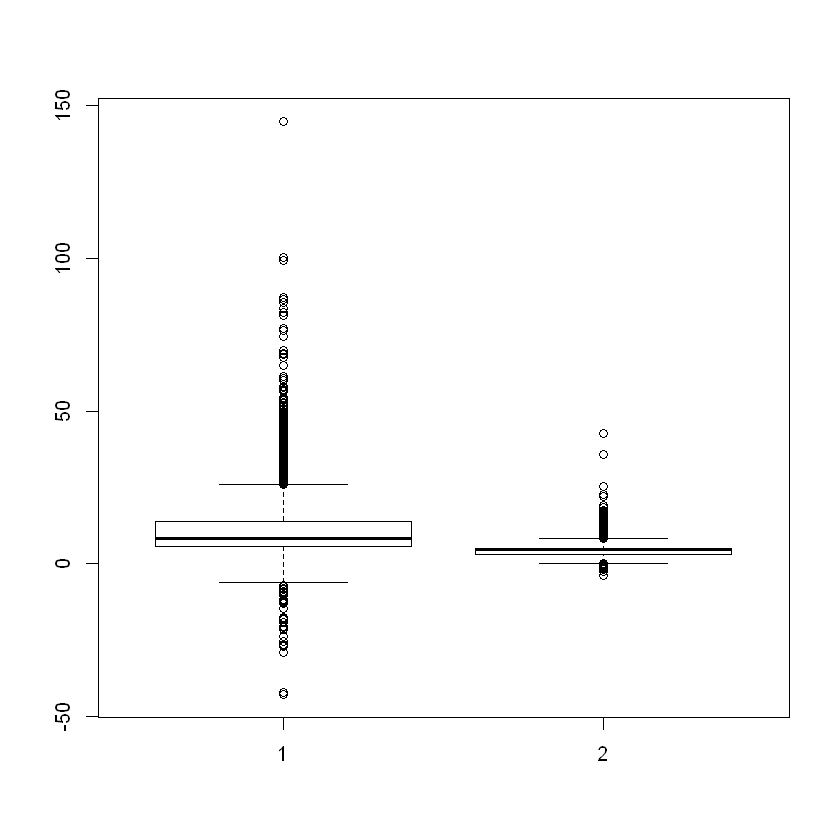

In [14]:
boxplot(data$transaction, data$total_fee)

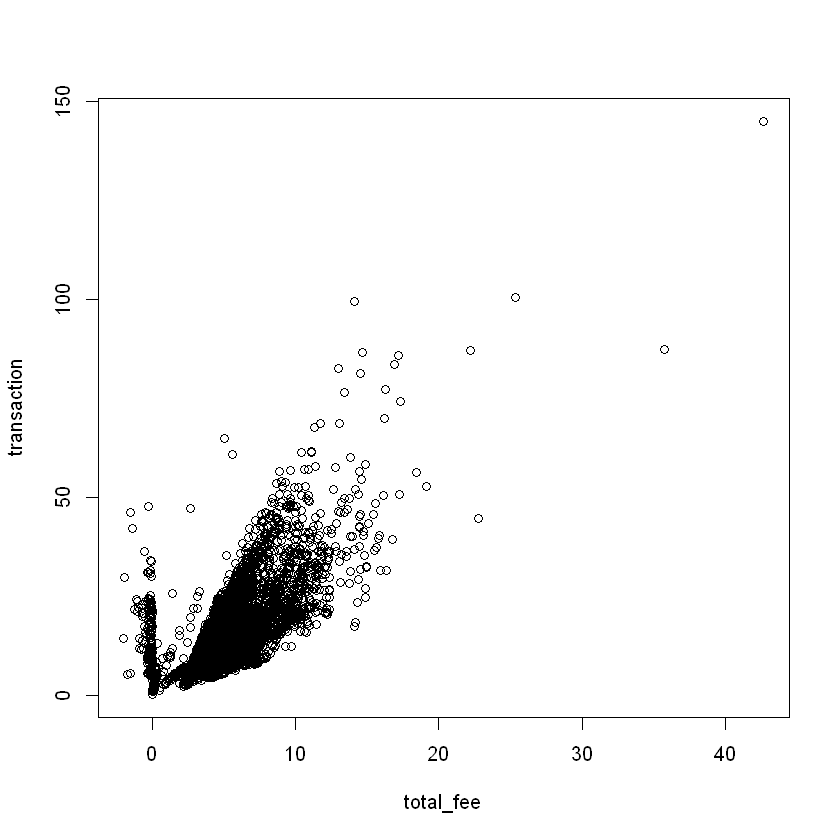

In [16]:
# total_fee와 transaction의 상관관계
data_1 <- 
data %>% filter(transaction > 0)
plot(transaction ~ total_fee, data= data_1)

total_fee가 0인 경우가 있네. 이상하네..

In [17]:
# cor.test() 상관계수의 유의성을 검사하는 함수 
cor.test(data_1$transaction, data_1$total_fee, method = "pearson")


	Pearson's product-moment correlation

data:  data_1$transaction and data_1$total_fee
t = 121.04, df = 22262, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6220155 0.6378606
sample estimates:
      cor 
0.6300036 


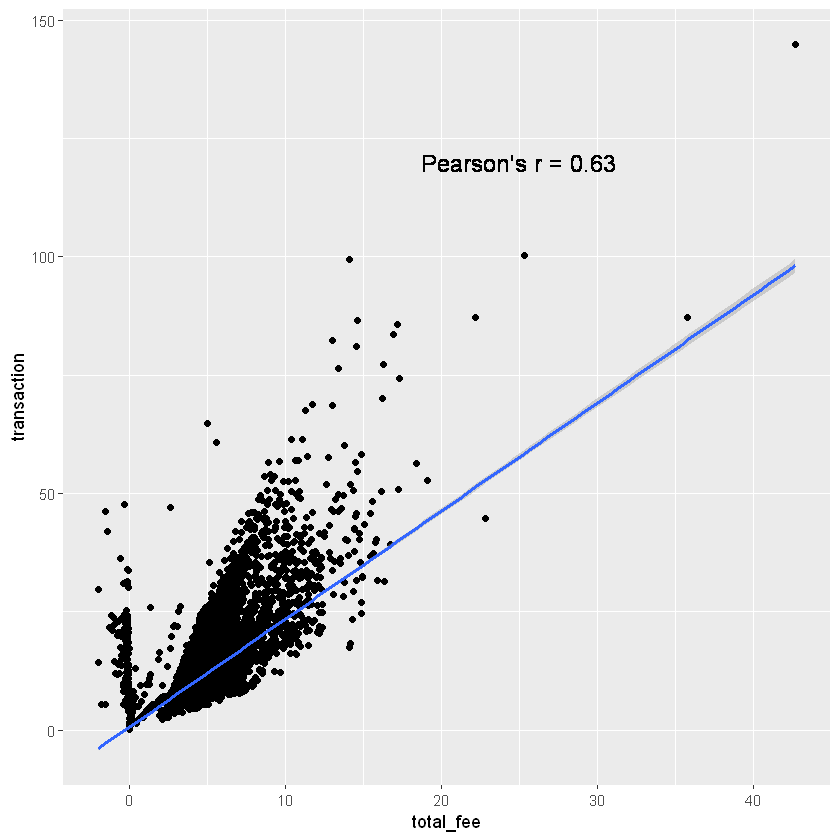

In [20]:
# transaction 과 total_fee는 0.6의 상관관계를가진다
ggplot(data=data_1, aes(x=total_fee, y=transaction))+
 geom_point()+ 
 geom_smooth(method="lm")+ 
 geom_text(aes(x=25,y=120),label="Pearson's r = 0.63", size=5)

In [21]:
cor.test(data_1$transaction, data_1$tax, method = "pearson")


	Pearson's product-moment correlation

data:  data_1$transaction and data_1$tax
t = 278.22, df = 22262, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8783016 0.8841704
sample estimates:
    cor 
0.88127 


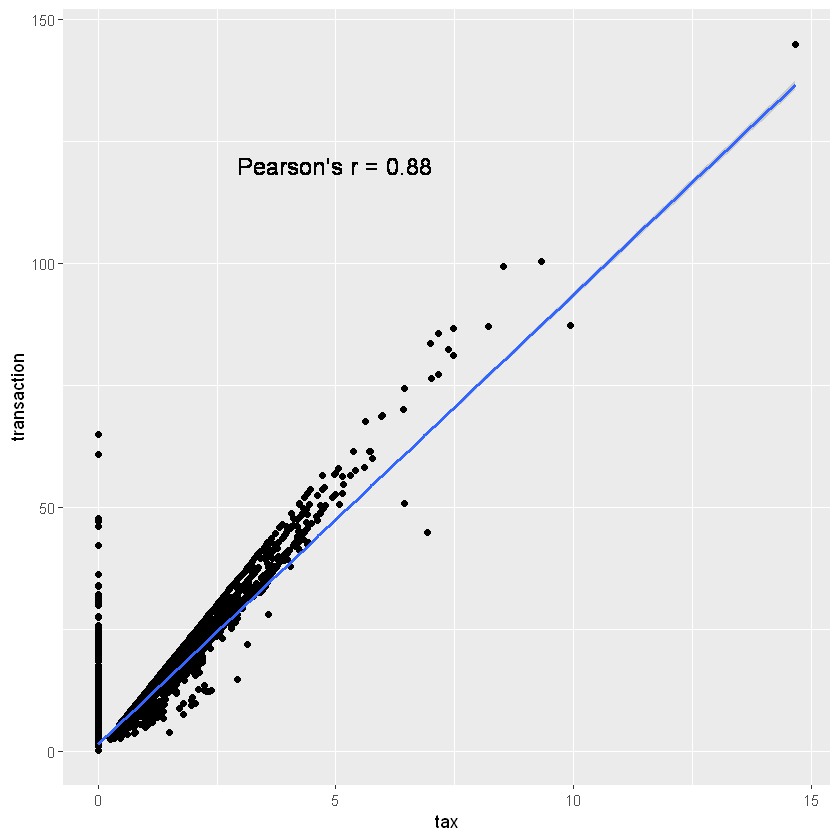

In [23]:
# transaction 과 tax는 0.88의 상관관계를가진다
ggplot(data=data_1, aes(x=tax, y=transaction))+
 geom_point()+ 
 geom_smooth(method="lm")+ 
 geom_text(aes(x=5,y=120),label="Pearson's r = 0.88", size=5)

,transaction,shipment_fee,tax,juhuasuan,taobaoke,tmall_commission,alipay_servicefee,net_value,total_fee
transaction,1.0000000,0.4371931,0.8812700,0.3540100,-0.36786932,0.8908314,0.9435115,0.9680400,0.63000361
shipment_fee,0.4371931,1.0000000,0.5650061,0.1515989,-0.23931411,0.4791553,0.4805138,0.2311015,0.87033115
tax,0.8812700,0.5650061,1.0000000,0.3019636,-0.18339746,0.8273976,0.9067501,0.7714623,0.80800943
juhuasuan,0.3540100,0.1515989,0.3019636,1.0000000,-0.17155584,0.4543129,0.3617386,0.3246983,0.27875717
taobaoke,-0.3678693,-0.2393141,-0.1833975,-0.1715558,1.00000000,-0.3459260,-0.3164543,-0.4472882,0.05056831
tmall_commission,0.8908314,0.4791553,0.8273976,0.4543129,-0.34592604,1.0000000,0.9238288,0.8289665,0.66463142
alipay_servicefee,0.9435115,0.4805138,0.9067501,0.3617386,-0.31645429,0.9238288,1.0000000,0.8820152,0.69146530
net_value,0.9680400,0.2311015,0.7714623,0.3246983,-0.44728819,0.8289665,0.8820152,1.0000000,0.41510245
total_fee,0.6300036,0.8703312,0.8080094,0.2787572,0.05056831,0.6646314,0.6914653,0.4151025,1.00000000


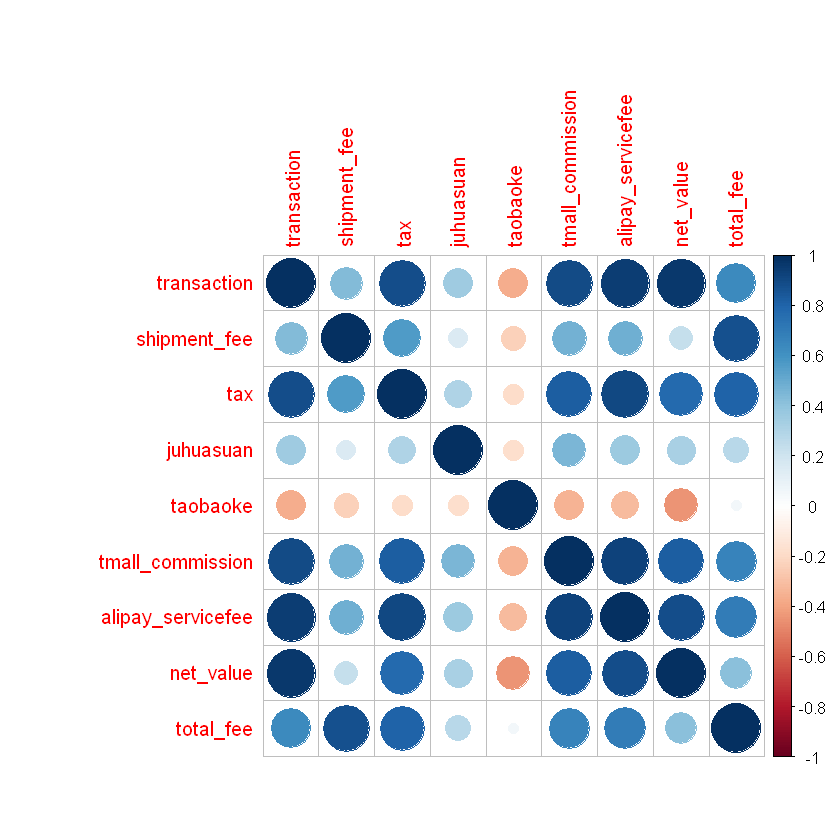

In [30]:
# 각 변수들과 transaction의 상관관계 확인
cor_data <- cor(data_1[,c(4:10,16:17)])
cor_data
corrplot(cor_data)


	Pearson's product-moment correlation

data:  data_1$total_fee and data_1$shipment_fee
t = 263.69, df = 22262, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8671086 0.8734808
sample estimates:
      cor 
0.8703312 


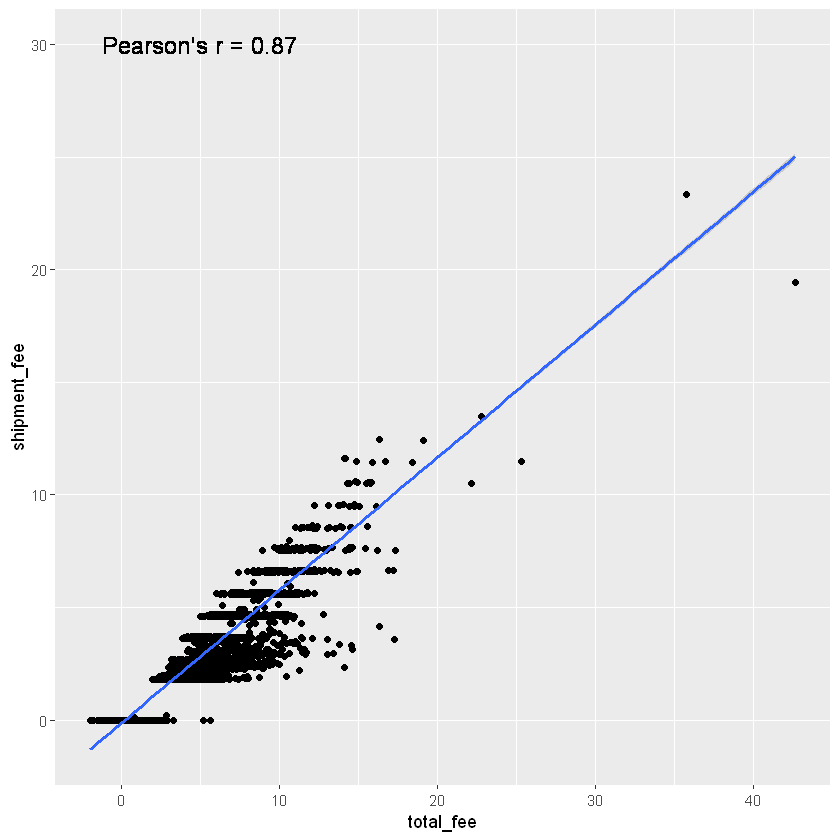

In [34]:
# total_fee 과 tax는 0.87의 상관관계를가진다
cor.test(data_1$total_fee, data_1$shipment_fee)
ggplot(data=data_1, aes(x=total_fee, y=shipment_fee))+
 geom_point()+ 
 geom_smooth(method="lm")+ 
 geom_text(aes(x=5,y=30),label="Pearson's r = 0.87", size=5)

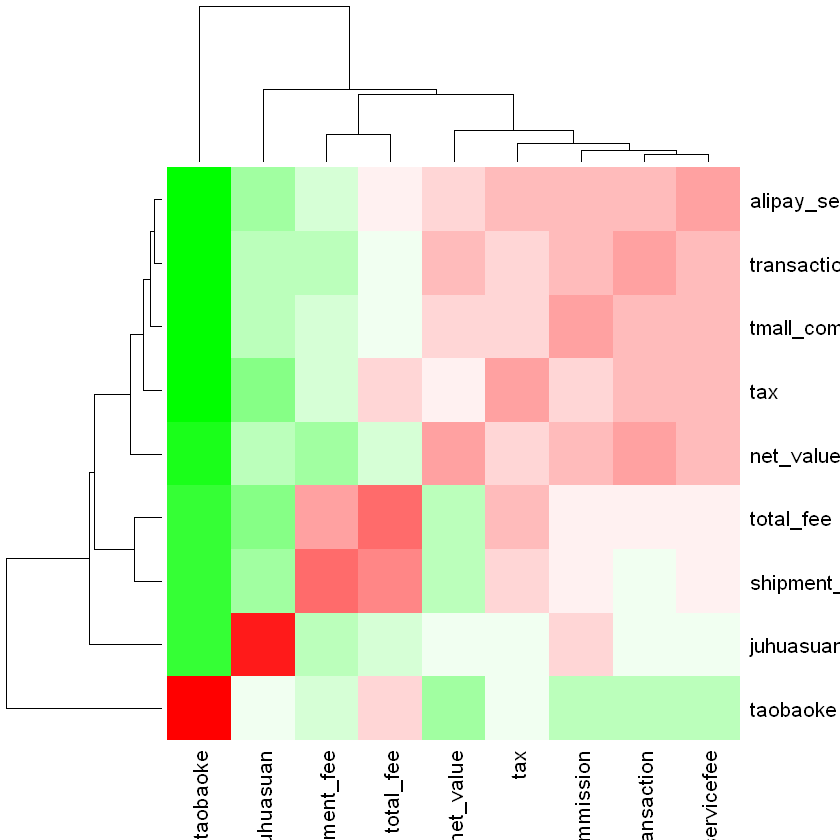

In [35]:
palette = colorRampPalette(c("green","white", "red")) (20)
heatmap(x= cor_data, col = palette)

In [39]:
data_2 <- 
 data_1[,c(4:10,16,17)]

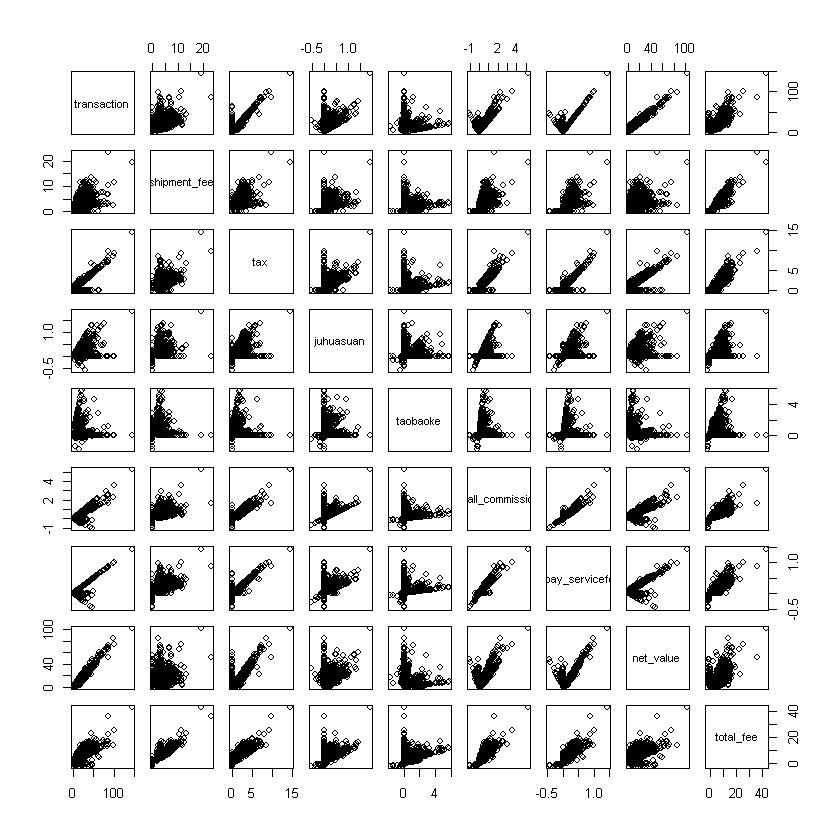

In [40]:
pairs(data_2)

In [41]:
data_1 %>% 
 filter(tax == 0) %>% 
 group_by(dateoforder) %>% 
 summarise(n = n(),
           sum_tax = sum(tax),
           sum_purchase = sum(transaction)) %>% 
 select(dateoforder, sum_purchase, n, sum_tax)

dateoforder,sum_purchase,n,sum_tax
2019-08-08,115.81,6,0
2019-08-09,86.52,5,0
2019-08-11,30.94,3,0
2019-08-13,329.13,60,0
2019-08-14,315.21,56,0
2019-08-15,26.27,4,0
2019-08-17,4899.28,899,0
2019-08-18,185.80,85,0
2019-08-19,83.75,52,0
2019-08-20,3.45,1,0


tax가 0인 경우가 산발적으로 일어나고 있음
orderdate가 분포된 것을 봐서.. 행사의 이유는 아닌것 같음
payment tax가 이미 포함된 경우인건지 확인해봐야함.
8/17, 9/27에 주로 집중 

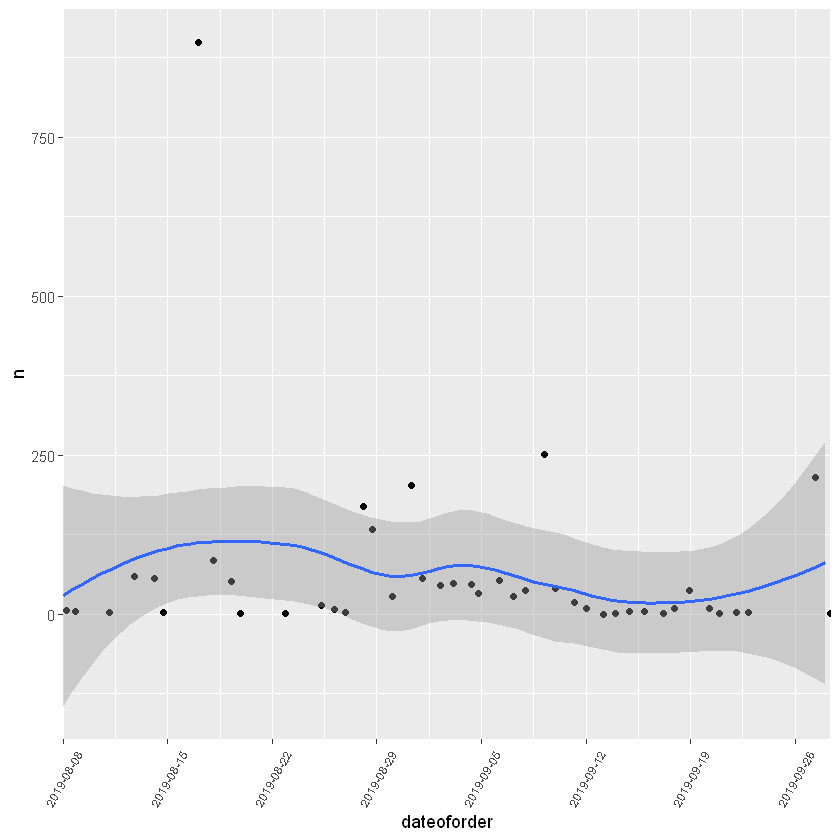

In [42]:
h1 <- data_1 %>% 
 filter(tax == 0) %>% 
 group_by(dateoforder) %>% 
 summarise(n = n(),
  sum_tax = sum(tax),
  sum_purchase = sum(transaction)) %>% 
 select(dateoforder, n)

ggplot(h1, aes(dateoforder, n))+geom_jitter()+geom_smooth(method = 'loess')+scale_x_date(date_breaks = "7 days", expand = c(0,0))+
 theme(
  axis.text.x = element_text(angle=60,size=7, vjust = 0.5)
 ) 

num_invocie	dateoforder	dataofpay	transaction	shipment_fee	tax	juhuasuan	taobaoke	tmall_commission	alipay_servicefee
"551541455066406706	"	2019-8-8 22:49	2019-9-2 0:00	3.33	0	0	0	0	0.08	0.03
"549060166024577599	"	2019-8-9 21:09	2019-9-2 0:00	8.22	0	0	0	0	0.18	0.08
"549059046902577599	"	2019-8-9 21:11	2019-9-2 0:00	8.22	0	0	0	0	0.18	0.08
"573201666225906620	"	2019-8-9 21:44	2019-9-2 0:00	4.68	0	0	0	0.06	0.17	0.05
"573374338541218993	"	2019-8-9 23:49	2019-9-2 0:00	4.67	0	0	0	0	0.17	0.05
"575596259341552250	"	2019-8-11 16:40	2019-9-2 0:00	3.62	0	0	0	0	0.08	0.04
"549424644235060592	"	2019-8-13 16:37	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"552350254862815410	"	2019-8-13 16:40	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"552253900964788603	"	2019-8-13 21:12	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"552257996507601704	"	2019-8-13 21:32	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"578555745668047447	"	2019-8-13 21:52	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"578683874862669652	"	2019-8-13 23:27	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"578769056110068032	"	2019-8-14 8:00	2019-9-2 0:00	5.52	0	0	0	1.38	0.18	0.06
"549597735592289691	"	2019-8-14 13:00	2019-9-2 0:00	5.55	0	0	0	1.38	0.18	0.06
"549726695018008380	"	2019-8-14 21:03	2019-9-2 0:00	5.55	0	0	0	1.38	0.18	0.06
"579862368895516458	"	2019-8-15 6:56	2019-9-2 0:00	6.57	0	0	0	1.66	0.22	0.07
"582808003708954734	"	2019-8-17 12:39	2019-9-2 0:00	5.53	0	0	0	1.34	0.11	0.06
"582727296776399860	"	2019-8-17 12:40	2019-9-2 0:00	5.53	0	0	0	1.34	0.11	0.06
"552932236965761201	"	2019-8-17 12:42	2019-9-2 0:00	5.53	0	0	0	1.34	0.11	0.06
"582734144619655452	"	2019-8-17 12:44	2019-9-2 0:00	5.53	0	0	0	1.34	0.11	0.06